In [26]:
import os
import sys
import pandas as pd
import numpy as np
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
from simulation import Simulation
from abmethods import Naive, DeltaMethod, DeltaSpark, GroupMethod, GroupNoSpark, MixedModel
from simuldata import UncorBinom, HetBinom
import test_aa_significance as aa
import run_defaultmodel_query as dmq

(542, 6)

# Introduction To The Group Model 



1. [What is the Group Model?](#groupmodel)
2. [How will it work in Distillery?](#distillery)
3. [Validation](#validation)
    1. [AA Testing](#aatesting)
    2. [Power Analysis](#poweranalysis)

# What is the Group Model?<a name="groupmodel"></a>

In [13]:
example_df = pd.DataFrame(data={'metric':np.array([1.2,2.3,2.9,1.9,5.5,5.1,7.4,6.1,8.2,7.8])})
metric_mean = example_df['metric'].mean()
example_df2 = example_df.copy()
example_df2['User'] = np.array(['user1', 'user2', 'user2', 'user2','user3','user3','user3','user3','user3','user3'])
grouped_mean = example_df2.groupby('User').mean().reset_index()
mean = grouped_mean.mean()[0]
mean

3.4166666666666665

## AA Testing<a name="aatesting"></a>

## Power Analysis<a name="poweranalysis"></a>

When there is a real effect, how large does the effect have to be for the test to find it

Basic Steps to Power Analysis

    1. simulate data that closely mimics real world data with a known estimate and variance
    2. increase effect size of the 'variant'; detect if test is significant
    3. repeat steps 1 and 2 to calculate Power at a certain effect size


## Power Analysis<a name="poweranalysis"></a>

* Two main distributions were used for the power analysis.
    1. Uncorrelated Data: A Binomial Distribution with no correlation within users
    2. Correlated Data: A Binomial Distribution with correlation within users, with users use rate defined by varying Poisson distributions 

In [19]:
mu=[0.3, 0.5, 0.8]
sigma=[0.05, 0.1, 0.05]
lamb=[2, 5, 30]
probs=[1/3, 1/2, 1/6]
n=1000
m=100
hetdata = HetBinom(lamb, mu, sigma, n, probs)
tests=[Naive(), GroupNoSpark()]
hetsim=Simulation(m, hetdata, tests)
hetsim.run()
hetdf=hetsim.power_test()
effect_sizes = hetdf['effect_size'].unique()
filter_sizes = [effect for i, effect in enumerate(effect_sizes) if i%3 == 0]
het_summary = hetdf.loc[hetdf['effect_size'].isin(filter_sizes), ['test','effect_size', 'p']].groupby(['effect_size', 'test']).mean()


bindata=UncorBinom(1, .6, n)
tests=[Naive(), GroupNoSpark()]
binsim=Simulation(m, bindata, tests)
binsim.run()
bindf=binsim.power_test()
bindf['truevar']= (.6 + bindf['effect_size'].astype(float))*(1 - .6 - bindf['effect_size'].astype(float))
bindf[bindf['test'].isin(['Delta Method', 'Group Method(NS)'])].groupby(['test', 'effect_size']).mean()
effect_sizes = bindf['effect_size'].unique()
filter_sizes = [effect for i, effect in enumerate(effect_sizes) if i%3 == 0]
bin_summary = bindf.loc[bindf['effect_size'].isin(filter_sizes), ['test','effect_size', 'p']].groupby(['effect_size', 'test']).mean()


0
20
40
60
80
0: 0.3
1: 0.3103448275862069
2: 0.32068965517241377
3: 0.3310344827586207
4: 0.3413793103448276
5: 0.35172413793103446
6: 0.3620689655172414
7: 0.37241379310344824
8: 0.38275862068965516
9: 0.3931034482758621
10: 0.40344827586206894
11: 0.41379310344827586
12: 0.4241379310344827
13: 0.43448275862068964
14: 0.44482758620689655
15: 0.45517241379310347
16: 0.46551724137931033
17: 0.4758620689655172
18: 0.4862068965517241
19: 0.496551724137931
20: 0.506896551724138
21: 0.5172413793103448
22: 0.5275862068965518
23: 0.5379310344827586
24: 0.5482758620689655
25: 0.5586206896551724
26: 0.5689655172413792
27: 0.5793103448275863
28: 0.5896551724137931
29: 0.6
0
20
40
60
80
0: 0.6
1: 0.603448275862069
2: 0.6068965517241379
3: 0.6103448275862069
4: 0.6137931034482759
5: 0.6172413793103448
6: 0.6206896551724138
7: 0.6241379310344828
8: 0.6275862068965516
9: 0.6310344827586206
10: 0.6344827586206896
11: 0.6379310344827586
12: 0.6413793103448275
13: 0.6448275862068965
14: 0.648275862068

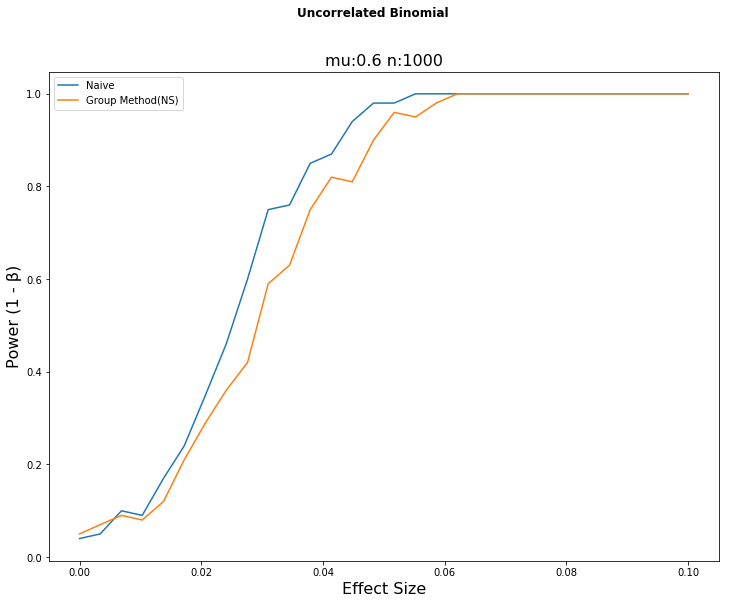

In [20]:
binsim.plot_power(bindf)

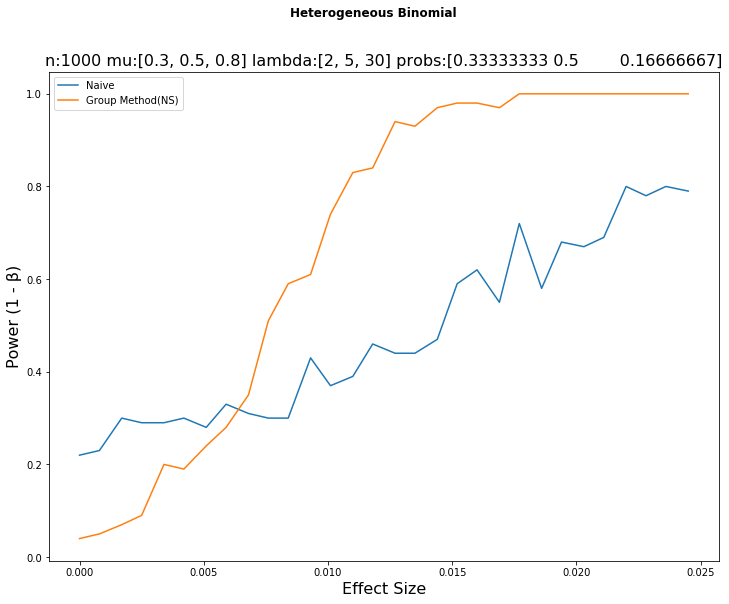

In [21]:
hetsim.plot_power(hetdf)